In [4]:
# ----- LIBS

# systems access
import os 

# data analysis
import numpy as np
import pandas as pd

# charts
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

# geoprocessing
import folium
from folium import plugins
import geopandas as gpd
from shapely.geometry import Point

# Roteiro

- Análise de simulação
    - Posicionamento e SF
    - Métricas da camada PHY
    - Cobertura/Alcance Lora
    - Métricas de performance da rede completa (Mac Layer)
    - Métricas de Consumo\
    
    
- Análise entre simulações
    - variação de Payload
    - variação de appPeriod
    - variação de nº de nós

# Análise de simulação

In [112]:
current_path = os.getcwd()
current_path = '/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/lorawan-experiments/'

In [113]:
# SET NUMBER OF SIMULATION REPEAT
NUM_SIM_REPEAT = 10

# SET simulation_folder path and simulation_id
simulation_folder = current_path + "/smart-campus-applications/simulations"
simulation_id = "/02/"

# SET FILES TO BE ANALYSE
sf_distribution_on_network = "network_position.txt"
phy_layer_packet_outcome = "phy_results.txt"
phy_layer_rssi_coverage = "rssi_results.txt"
mac_layer_performance_metrics = "net_results.txt"

## Posicionamento x SF

In [114]:
# ----- DATASET
file_to_be_analysed = sf_distribution_on_network
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

net_pos_df = pd.read_csv(path_to_simulation, header=None) 
net_pos_df.columns = ["nodeId", "posX", "posY", "posZ",
                           "sf", "gwId", "gw_posX", "gw_posY", "gw_posZ", "distance"]
print("\nSHAPE:", net_pos_df.shape)
net_pos_df.head()


SHAPE: (5630, 10)


,nodeId,posX,posY,posZ,sf,gwId,gw_posX,gw_posY,gw_posZ,distance
0,0,1527.410,2180.210,1.5,7,563,1694.97,2141.47,1.5,171.990
1,1,297.312,1965.810,1.5,12,563,1694.97,2141.47,1.5,1408.660
2,2,1535.550,1646.180,1.5,7,563,1694.97,2141.47,1.5,520.315
3,3,1149.490,1831.090,1.5,7,563,1694.97,2141.47,1.5,627.609
4,4,1186.800,667.866,1.5,9,563,1694.97,2141.47,1.5,1558.770


In [122]:
_max = int(net_pos_df.shape[0]/NUM_SIM_REPEAT)
# net_position_df = net_pos_df.iloc[0:_max] # 1º simu
net_position_df = net_pos_df.iloc[_max:_max*2] # 2º simu
# net_position_df = net_pos_df.iloc[_max*2:_max*3] # 3º simu
# net_position_df = net_pos_df.iloc[_max*3:_max*4] # 4º simu
# net_position_df = net_pos_df.iloc[_max*4:_max*5] # 5º simu
# net_position_df = net_pos_df.iloc[_max*5:_max*6] # 6º simu
# net_position_df = net_pos_df.iloc[_max*6:_max*7] # 7º simu
# net_position_df = net_pos_df.iloc[_max*7:_max*8] # 8º simu
# net_position_df = net_pos_df.iloc[_max*8:_max*9] # 9º simu
# net_position_df = net_pos_df.iloc[_max*9:_max*10] # 10º simu
print("\nSHAPE:", net_position_df.shape)
net_position_df.head()


SHAPE: (563, 10)


,nodeId,posX,posY,posZ,sf,gwId,gw_posX,gw_posY,gw_posZ,distance
563,0,1527.410,2180.210,1.5,7,563,1694.97,2141.47,1.5,171.990
564,1,297.312,1965.810,1.5,10,563,1694.97,2141.47,1.5,1408.660
565,2,1535.550,1646.180,1.5,7,563,1694.97,2141.47,1.5,520.315
566,3,1149.490,1831.090,1.5,7,563,1694.97,2141.47,1.5,627.609
567,4,1186.800,667.866,1.5,9,563,1694.97,2141.47,1.5,1558.770


In [123]:
print("Distribution of nodes per SF:")
print("SF 7:", len(net_position_df[net_position_df["sf"] == 7]) )
print("SF 8:", len(net_position_df[net_position_df["sf"] == 8]) )
print("SF 9:", len(net_position_df[net_position_df["sf"] == 9]) )
print("SF 10:", len(net_position_df[net_position_df["sf"] == 10]) )
print("SF 11:", len(net_position_df[net_position_df["sf"] == 11]) )
print("SF 12:", len(net_position_df[net_position_df["sf"] == 12]) )

Distribution of nodes per SF:
SF 7: 159
SF 8: 72
SF 9: 90
SF 10: 87
SF 11: 45
SF 12: 110


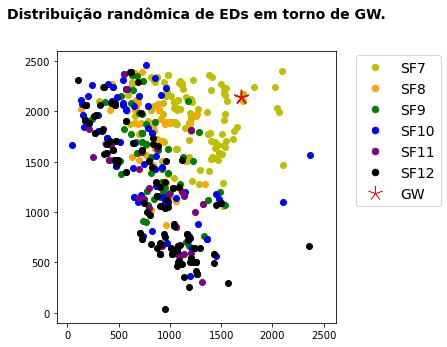

In [124]:
# ----- PLOT SIZE SETTINGS

# chart bounds
# o mapa da Unicamp Normalizado tem ~2508x2439 metros
xMin_bound, xMax_bound = -100, 2620
yMin_bound, yMax_bound = -100, 2600 

# chart figsize
x_figsize, y_figsize = 5, 5


# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
       
    # ED points
    colors = ['y','orange', 'green', 'blue', 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [], color = 'white', marker = 'o',  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5, markerfacecolor = colors[sf], markersize = 7, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [], color = 'white', marker = (5,2), markeredgecolor = 'red',
                                  markeredgewidth = 0.5, markerfacecolor = 'red', markersize = 15, 
                                  label = 'GW')
    plots_legends.append(scatter_lgd)
    
    return plots_legends

# ----- EDs LISTS per SF

# to initialize multiple lists
eds_x_sf7, eds_y_sf7, eds_x_sf8, eds_y_sf8 = ([] for i in range(4))
eds_x_sf9, eds_y_sf9, eds_x_sf10, eds_y_sf10 = ([] for i in range(4))
eds_x_sf11, eds_y_sf11, eds_x_sf12, eds_y_sf12 = ([] for i in range(4))


for i in range (len(net_position_df)):
    if net_position_df.iloc[i].sf == 7.0:
        eds_x_sf7.append(net_position_df.iloc[i].posX)
        eds_y_sf7.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 8.0:
        eds_x_sf8.append(net_position_df.iloc[i].posX)
        eds_y_sf8.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 9.0:
        eds_x_sf9.append(net_position_df.iloc[i].posX)
        eds_y_sf9.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 10.0:
        eds_x_sf10.append(net_position_df.iloc[i].posX)
        eds_y_sf10.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 11.0:
        eds_x_sf11.append(net_position_df.iloc[i].posX)
        eds_y_sf11.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 12.0:
        eds_x_sf12.append(net_position_df.iloc[i].posX)
        eds_y_sf12.append(net_position_df.iloc[i].posY)


# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7')
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8')
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9')
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10')
ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF10')

# draw GW
ax.scatter(net_position_df.iloc[0].gw_posX, net_position_df.iloc[0].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.4, 1.01), prop={'size': 14})

# chart bounds
ax.set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.1)
plt.show()
fig.savefig('dist_rand_ed_gw.png',bbox_inches='tight')

## Métricas de performance da rede completa (Mac Layer)

In [135]:
# ----- DATASET
file_to_be_analysed = mac_layer_performance_metrics
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

net_df = pd.read_csv(path_to_simulation, header=None) 
net_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]

print("\nSHAPE:", net_df.shape)
net_df.head()


SHAPE: (10, 5)


,nSent,nReceiv,PER,PLR,PDR
0,563,489,0.151329,0.131439,0.868561
1,563,467,0.205567,0.170515,0.829485
2,563,485,0.160825,0.138544,0.861456
3,563,486,0.158436,0.136767,0.863233
4,563,487,0.156057,0.134991,0.865009


In [136]:
# Valores médios de cada coluna
print("NETWORK PERFORMANCE METRICS:\n")
print("nSent:", net_df['nSent'].mean())
print("nReceiv:", net_df['nReceiv'].mean())
print("\nPER:", net_df['PER'].mean())
print("PLR:", net_df['PLR'].mean())
print("PDR:", net_df['PDR'].mean())

NETWORK PERFORMANCE METRICS:

nSent: 563.0
nReceiv: 481.5

PER: 0.1694963
PLR: 0.1447603
PDR: 0.8552397


## Métricas da camada PHY

In [125]:
# ----- DATASET
file_to_be_analysed = phy_layer_packet_outcome
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

phy_df = pd.read_csv(path_to_simulation, header=None) 
phy_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]

print("\nSHAPE:", phy_df.shape)
phy_df.head(10)


SHAPE: (10, 6)


,gwID,received,interfered,noMoreReceivers,underSensitivity,lost
0,0,489,0,0,74,0
1,0,467,0,0,96,0
2,0,485,0,0,78,0
3,0,486,1,0,76,0
4,0,487,0,0,76,0
5,0,472,2,0,89,0
6,0,481,0,0,82,0
7,0,485,0,0,78,0
8,0,485,0,0,78,0
9,0,478,0,0,85,0


In [126]:
# Valores médios de cada coluna
print("PHY LAYER - Packet Outcome METRICS:\n")
print("received:", phy_df['received'].mean())
print("interfered:", phy_df['interfered'].mean())
print("noMoreReceivers:", phy_df['noMoreReceivers'].mean())
print("underSensitivity:", phy_df['underSensitivity'].mean())
print("lost:", phy_df['lost'].mean())

PHY LAYER - Packet Outcome METRICS:

received: 481.5
interfered: 0.3
noMoreReceivers: 0.0
underSensitivity: 81.2
lost: 0.0


In [127]:
def percent_conversion (total_pkg_expected, number):
    percent = (100 * number)/total_pkg_expected
    return percent

<ipython-input-129-352de9b5942d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


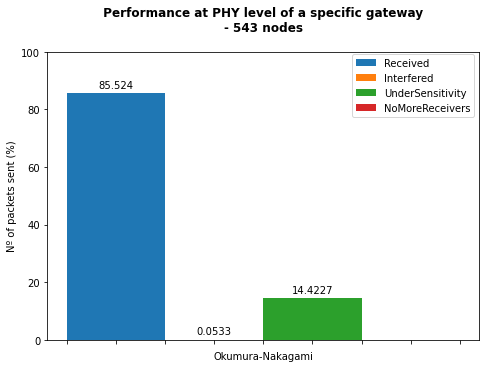

In [129]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Okumura-Nakagami'] 

data = [[percent_conversion(563,phy_df['received'].mean())],
[percent_conversion(563,phy_df['interfered'].mean())],
[ percent_conversion(563,phy_df['underSensitivity'].mean())],
[percent_conversion(563, phy_df['noMoreReceivers'].mean())]]

# print(len(data))

X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_receiv = ax.bar(X + 0.00, data[0], width = 0.2, label='Received')
bar_inter = ax.bar(X + 0.2, data[1], width = 0.2, label='Interfered')
bar_usens = ax.bar(X + 0.4, data[2], width = 0.2, label='UnderSensitivity')
bar_nmreceiv = ax.bar(X + 0.6, data[3], width = 0.2, label='NoMoreReceivers')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nº of packets sent (%)')
ax.set_xlabel('Okumura-Nakagami')
ax.set_title(' Performance at PHY level of a specific gateway \n- 543 nodes', fontweight='bold', fontsize=12, y=1.05)
ax.set_xticklabels(labels)
ax.set_ylim([0, 100]) 
ax.legend(bbox_to_anchor=(1.0, 1.01), prop={'size': 10})



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bar_receiv)
autolabel(bar_inter)
autolabel(bar_usens)


plt.show()
#fig.savefig('mac_performance.png',bbox_inches='tight')

# Delay calculation

In [130]:
# ----- Open Datasets - Camada Delay

file = "delay_results.txt"
path_cenario = current_path + "/smart-campus-applications/simulations/02/" + file
delay_df = pd.read_csv(path_cenario, header=None) 
# Average delay (ms),  Average delay (ns) per SF, soma dos Delays per SF (ns):
delay_df.columns = ["sent", "receive", "average_delay_s", "average_delay_ns", "delay_p_sf_ns"]
print("\nSHAPE:", delay_df.shape)
delay_df.head(6)
delay_df = delay_df.iloc[0:7]
delay_df.head(7)


SHAPE: (60, 5)


,sent,receive,average_delay_s,average_delay_ns,delay_p_sf_ns
0,124,116,1972,+1.97286e+09ns,+2.28852e+11ns
1,42,38,1127,+1.12727e+09ns,+4.28361e+10ns
2,70,57,590,+5.90583e+08ns,+3.36632e+10ns
3,75,63,322,+3.22206e+08ns,+2.0299e+10ns
4,78,64,169,+1.69155e+08ns,+1.0826e+10ns
5,174,151,97,+9.79791e+07ns,+1.47948e+10ns
6,110,101,1940,+1.94021e+09ns,+1.95961e+11ns


<AxesSubplot:xlabel='Average Delay per SF'>

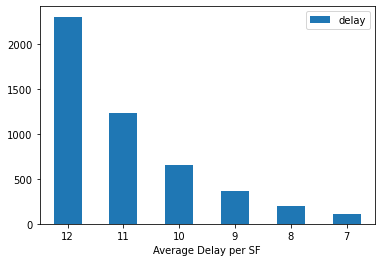

In [137]:
df = pd.DataFrame({'Average Delay per SF':['12', '11', '10', '9', '8', '7'], 'delay':[2301, 1232, 657, 369, 195, 112]})
ax = df.plot.bar(x='Average Delay per SF', y='delay', rot=0)

ax

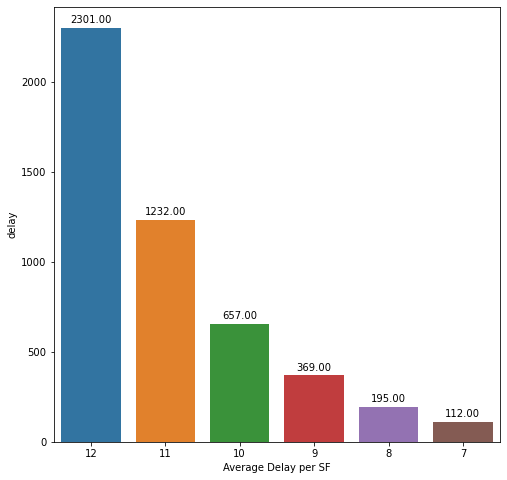

In [138]:
import seaborn as sns
# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Average Delay per SF", y="delay", data=df)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

## Cobertura/Alcance LoRa

In [140]:
# ----- DATASET
file_to_be_analysed = phy_layer_rssi_coverage
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

rssi_df = pd.read_csv(path_to_simulation, header=None) 
rssi_df.columns = ["gwId", "nodeId", "RSSI_Sim", "distance_between"]

# print(path)
print("\nSHAPE:", rssi_df.shape)
rssi_df = rssi_df.iloc[0:47]
print("\nSHAPE:", rssi_df.shape)
rssi_df.head()

# TO BE DONE - TIRAR RSSI MEDIO REFERENTE A CADA POSIÇÃO DO DATASET, OBTENDO A COBERTURA MÉDIA TOTAL DE RSSI


SHAPE: (5630, 4)

SHAPE: (47, 4)


,gwId,nodeId,RSSI_Sim,distance_between
0,563,0,-92.344,171.990
1,563,1,-132.291,1408.660
2,563,2,-134.428,520.315
3,563,3,-114.105,627.609
4,563,4,-141.452,1558.770


In [141]:
# Visualizando dataset criado
coletores_df = pd.read_csv("coletores_pos_dataset_elev.csv") 
print("DATASET SHAPE:", coletores_df.shape)
coletores_df.head()

DATASET SHAPE: (47, 10)


,id,name,x,y,z,elevation,latitude,longitude,delta,elev_min
0,1321.0,INOVA,1527.405075,2180.212233,1.5,644.458740,-22.814543,-47.059340,28.587447,8.500000
1,535.0,BC,297.311734,1965.812273,1.5,602.154968,-22.816324,-47.071348,13.716325,8.500000
2,802.0,CBMEG,1535.553550,1646.180816,1.5,652.513123,-22.819365,-47.059333,36.641830,8.500000
3,845.0,CCUEC,1149.489906,1831.086023,1.5,616.788940,-22.817648,-47.063068,0.917647,0.917647
4,1037.0,GASTROCENTRO,1186.795533,667.866479,1.5,635.025085,-22.828153,-47.062863,19.153792,8.500000


In [142]:
rssi_df['latitude'] = coletores_df['latitude']
rssi_df['longitude'] = coletores_df['longitude']
print("DATASET SHAPE:", rssi_df.shape)
rssi_df.head(5)

DATASET SHAPE: (47, 6)


,gwId,nodeId,RSSI_Sim,distance_between,latitude,longitude
0,563,0,-92.344,171.990,-22.814543,-47.059340
1,563,1,-132.291,1408.660,-22.816324,-47.071348
2,563,2,-134.428,520.315,-22.819365,-47.059333
3,563,3,-114.105,627.609,-22.817648,-47.063068
4,563,4,-141.452,1558.770,-22.828153,-47.062863


In [13]:
# rssi_df['latitude'].iloc[0:1].values[0]

In [143]:
heat_data = []
for i in range(rssi_df.shape[0]):
    heat_data.append([
        rssi_df['latitude'].iloc[i:i+1].values[0],
        rssi_df['longitude'].iloc[i:i+1].values[0],
        rssi_df['RSSI_Sim'].iloc[i:i+1].values[0]
    ])

# print(heat_data)

In [14]:
#LEGENDA
# import branca

# legend_html = '''
# {% macro html(this, kwargs) %}
# <div style="
#     position: fixed; 
#     bottom: 80px;
#     left: 20px;
#     width: 150px;
#     height: 80px;
#     top: 425px;
#     z-index:9999;
#     font-size:13px;
#     ">
#     <p><a style="margin-left:10px;"><b>RSSI (Dbm)</a></b></p>
#     <p><a style="color:#2652ca;font-size:150%;margin-left:20px;">&diams;</a>&emsp;<b>[0, -80]</b></p>
#     <p><a style="color:#338dff;font-size:150%;margin-left:20px;">&diams;</a>&emsp;<b>[-81, -100]</b></p>
#     <p><a style="color:#33c1ff;font-size:150%;margin-left:20px;">&diams;</a>&emsp;<b>[-101, -150]</b></p>
# </div>
# <div style="
#     position: fixed; 
#     bottom: 30px;
#     left: 20px;
#     width: 150px;
#     height: 140px; 
#     z-index:9998;
#     font-size:14px;
#     background-color: #ffffff;
#     border:2px solid grey;
#     opacity: 0.9;
#     ">
# </div>
# {% endmacro %}
# '''
# legend = branca.element.MacroElement()
# legend._template = branca.element.Template(legend_html)

In [25]:
# # ---- UNICAMP DYNAMIC PLOT MAP & MARKERS OF POSITIONS THAT PACKET WERE RECEIVE

# # create folium map
# fmap = folium.Map(width= 500,height=600,location=[-22.822617, -47.067], zoom_start=15, tiles='OpenStreetMap')

# # add markers
# for data in heat_data:
#   lat, lng, rssi = data[0], data[1], data[2]
# #   print(lat, lng)
# #   print('RSSI', rssi)
#   if rssi >= -80:
#         color_rssi = 'darkblue'
#   elif rssi < -80 and rssi >= -100:
#         color_rssi = 'blue'
#   elif rssi < -100:
#         color_rssi = "lightblue"

#   folium.Marker(
#       location=[float(lat), float(lng)],
#       popup="Lat: " + str(lat) + ", Lng: " + str(lng)+ ", Rssi: " + str(rssi),
#       icon=folium.Icon(color=color_rssi),
#   ).add_to(fmap)

# fmap.get_root().add_child(legend)

# fmap

In [26]:
# # salve map
# fn="coverage.html"
# fmap.save(fn)

# Análise entre simulações

In [18]:
current_path = os.getcwd()
current_path = '/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/lorawan-experiments'

###  Métricas da camada PHY

In [19]:
# Open Datasets - Camada phy
file = "phy_results.txt"
path_cenario_0 = current_path + "/smart-campus-applications/simulations/16/" + file
path_cenario_1 = current_path + "/smart-campus-applications/simulations/17/" + file
# path_cenario_2 = current_path + "/smart-campus-applications/simulations/08/" + file
# path_cenario_3 = current_path + "/smart-campus-applications/simulations/09/" + file

cenario_0_df = pd.read_csv(path_cenario_0, header=None) 
cenario_0_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]
print("\nSHAPE:", cenario_0_df.shape)
# cenario_0_df.head()

cenario_1_df = pd.read_csv(path_cenario_1, header=None) 
cenario_1_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]
print("SHAPE:", cenario_1_df.shape)
# cenario_1_df.head()

# cenario_2_df = pd.read_csv(path_cenario_2, header=None) 
# cenario_2_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]
# print("SHAPE:", cenario_2_df.shape)
# # cenario_2_df.head()

# cenario_3_df = pd.read_csv(path_cenario_3, header=None) 
# cenario_3_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]
# print("SHAPE:", cenario_3_df.shape)


SHAPE: (1, 6)
SHAPE: (1, 6)


In [ ]:
cenario_0_df['received'].mean()

In [ ]:
# # REMOVE OUTLIERS
# cenario_2_df = cenario_2_df.iloc[1:].head()

In [14]:
def percent_conversion (total_pkg_expected, number):
    percent = (100 * number)/total_pkg_expected
    return percent

4


<BarContainer object of 2 artists>

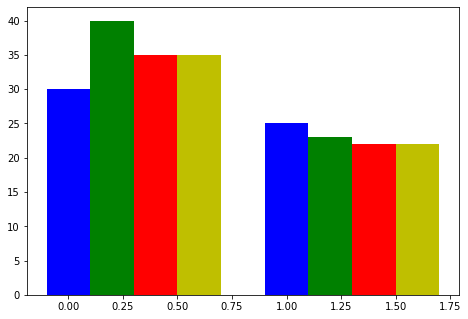

In [59]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25],
[40, 23],
[35, 22],
[35, 22]]

print(len(data))

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.2)
ax.bar(X + 0.2, data[1], color = 'g', width = 0.2)
ax.bar(X + 0.4, data[2], color = 'r', width = 0.2)
ax.bar(X + 0.6, data[3], color = 'y', width = 0.2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

<BarContainer object of 4 artists>

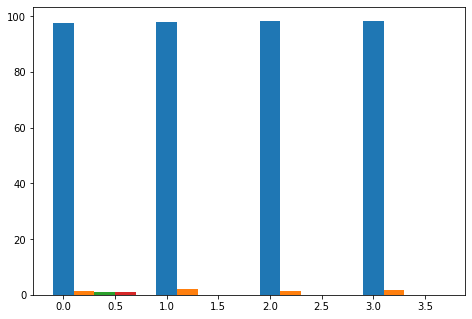

In [10]:
# labels = ['1 ano', '30d - 30min', '30d -10min'] 
labels = ['I-Okum_N', 'II-Okum', 'III-Log', 'IV-Log_Corr'] 

# total de pacotes esperados
total_pkg_01 = 148463
total_pkg_02 = 148463
total_pkg_03 = 148463
total_pkg_04 = 148463

received = [percent_conversion(total_pkg_01, cenario_0_df['received'].mean()),
            percent_conversion(total_pkg_02, cenario_1_df['received'].mean()),
            percent_conversion(total_pkg_03, cenario_2_df['received'].mean()),
            percent_conversion(total_pkg_04, cenario_3_df['received'].mean()),
           ]


interfered = [percent_conversion(total_pkg_01, cenario_0_df['interfered'].mean()),
              percent_conversion(total_pkg_02, cenario_1_df['interfered'].mean()),
              percent_conversion(total_pkg_03, cenario_2_df['interfered'].mean()),
              percent_conversion(total_pkg_04, cenario_3_df['interfered'].mean()),
             ]

noMoreReceivers = [percent_conversion(total_pkg_01, cenario_0_df['noMoreReceivers'].mean()),
                   percent_conversion(total_pkg_02, cenario_1_df['noMoreReceivers'].mean()),
                   percent_conversion(total_pkg_03, cenario_2_df['noMoreReceivers'].mean()),
                   percent_conversion(total_pkg_04, cenario_3_df['noMoreReceivers'].mean()),
                  ]

underSensitivity = [percent_conversion(total_pkg_01, cenario_0_df['underSensitivity'].mean()),
                    percent_conversion(total_pkg_02, cenario_1_df['underSensitivity'].mean()),
                    percent_conversion(total_pkg_03, cenario_2_df['underSensitivity'].mean()),
                    percent_conversion(total_pkg_04, cenario_3_df['underSensitivity'].mean())
                   ]


# data = [received, received, received, received]
data = [received, interfered, underSensitivity, underSensitivity]
X = np.arange(len(data))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], width = 0.2)
ax.bar(X + 0.2, data[1], width = 0.2)
ax.bar(X + 0.40, data[2], width = 0.2)
ax.bar(X + 0.6, data[3],  width = 0.2)

2


ValueError: shape mismatch: objects cannot be broadcast to a single shape

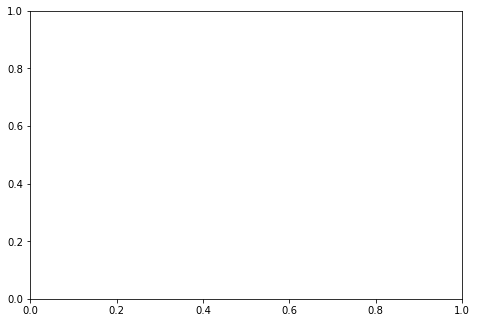

In [75]:
# labels = ['1 ano', '30d - 30min', '30d -10min'] 
labels = ['I-Okum_N', 'II-Okum'] 

# total de pacotes esperados
total_pkg_01 = 47663
total_pkg_02 = 47663

one = [percent_conversion(total_pkg_01, cenario_0_df['received'].mean()),
            percent_conversion(total_pkg_01, cenario_0_df['interfered'].mean()),
            percent_conversion(total_pkg_01, cenario_0_df['underSensitivity'].mean()),
            percent_conversion(total_pkg_01, cenario_0_df['noMoreReceivers'].mean())]



two =  [percent_conversion(total_pkg_02, cenario_1_df['received'].mean()),
            percent_conversion(total_pkg_02, cenario_1_df['interfered'].mean()),
            percent_conversion(total_pkg_02, cenario_1_df['underSensitivity'].mean()),
            percent_conversion(total_pkg_02, cenario_1_df['noMoreReceivers'].mean())]

# x = np.arange(len(labels))  # the label locations
# width = 0.4  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x-width, received, width, label='Received')
# rects2 = ax.bar(x, interfered, width, label='Interfered')
# rects3 = ax.bar(x + width, underSensitivity, width, label='UnderSensitivity')
# rects4 = ax.bar(x + width*2, noMoreReceivers, width, label='NoMoreReceivers')

# print(received)
# print(interfered)
# print(underSensitivity)
# print(noMoreReceivers)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Nº of Packets (%)')
# ax.set_xlabel('Payload size')
# ax.set_title(' Performance at PHY level of a specific gateway \n- SF7, 252, 372, 522 nodes', fontweight='bold', fontsize=12, y=1.05)
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.set_ylim([0, 110]) 
# ax.legend(bbox_to_anchor=(1.01, 1.01), prop={'size': 10})


data = [one, two]
print(len(data))

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.2)
ax.bar(X + 0.2, data[1], color = 'g', width = 0.2)
ax.bar(X + 0.4, data[2], color = 'r', width = 0.2)
ax.bar(X + 0.6, data[3], color = 'y', width = 0.2)

plt.show()

# fig.savefig('phy_performance.png',bbox_inches='tight')

## Métricas de performance da rede completa (Mac Layer)

In [26]:
# ----- Open Datasets - Camada MAC

file = "net_results.txt"
path_cenario_0 = current_path + "/smart-campus-applications/simulations/16/" + file
path_cenario_1 = current_path + "/smart-campus-applications/simulations/17/" + file
# path_cenario_2 = current_path + "/smart-campus-applications/simulations/03/" + file
# path_cenario_3 = current_path + "/simulations/05/" + file

net_0_df = pd.read_csv(path_cenario_0, header=None) 
net_0_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]
print("\nSHAPE:", net_0_df.shape)
# net_0_df.head()

net_1_df = pd.read_csv(path_cenario_1, header=None) 
net_1_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]
print("SHAPE:", net_1_df.shape)
net_1_df.head()

# net_2_df = pd.read_csv(path_cenario_2, header=None) 
# net_2_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]
# print("SHAPE:", net_2_df.shape)
# net_2_df.head()

# net_3_df = pd.read_csv(path_cenario_3, header=None) 
# net_3_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]
# print("SHAPE:", net_3_df.shape)
# net_3_df.head()


SHAPE: (1, 5)
SHAPE: (1, 5)


,nSent,nReceiv,PER,PLR,PDR
0,47663,42927,0.110327,0.099364,0.900636


In [ ]:
#REMOVE OUTLIERS
# net_2_df = net_2_df.iloc[1:].head()

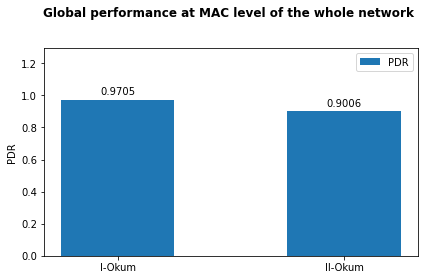

In [30]:
# labels = ['1 ano', '30d - 30min', '30d -10min'] 
labels = ['I-Okum', 'II-Okum'] 

pdr = [net_0_df['PDR'].mean(), net_1_df['PDR'].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, pdr, width, label='PDR')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PDR')
ax.set_title('Global performance at MAC level of the whole network \n', fontweight='bold', fontsize=12, y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.set_xlim([0, 1]) 
ax.set_ylim([0, max(pdr) + max(pdr)/3]) 
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()
fig.savefig('mac_performance.png',bbox_inches='tight')

In [34]:
# ----- Open Datasets - Camada Delay

file = "delay_results.txt"
path_cenario_0 = current_path + "/smart-campus-applications/simulations/16/" + file
path_cenario_1 = current_path + "/smart-campus-applications/simulations/17/" + file
# path_cenario_2 = current_path + "/smart-campus-applications/simulations/03/" + file
# path_cenario_3 = current_path + "/simulations/05/" + file

delay_0_df = pd.read_csv(path_cenario_0, header=None) 
# Average delay (ms),  Average delay (ns) per SF, soma dos Delays per SF (ns):
delay_0_df.columns = ["sent", "receive", "average_delay_s", "average_delay_ns", "delay_p_sf_ns"]
print("\nSHAPE:", net_0_df.shape)
# delay_0_df.head()

delay_1_df = pd.read_csv(path_cenario_1, header=None) 
delay_1_df.columns = ["sent", "receive", "average_delay_s", "average_delay_ns", "delay_p_sf_ns"]
print("SHAPE:", delay_1_df.shape)
delay_1_df.head()

# delay_2_df = pd.read_csv(path_cenario_2, header=None) 
# delay_2_df.columns = ["sent", "receive", "average_delay_s", "average_delay_ns", "delay_p_sf_ns"]
# print("SHAPE:", delay_2_df.shape)
# delay_2_df.head()

# delay_3_df = pd.read_csv(path_cenario_3, header=None) 
# delay_3_df.columns = ["sent", "receive", "average_delay_s", "average_delay_ns", "delay_p_sf_ns"]
# print("SHAPE:", delay_3_df.shape)


SHAPE: (1, 5)
SHAPE: (6, 5)


,sent,receive,average_delay_s,average_delay_ns,delay_p_sf_ns
0,7405,6900,1645,+1.64574e+09ns,+1.13556e+13ns
1,3944,3538,904,+9.04572e+08ns,+3.20038e+12ns
2,7206,6350,452,+4.52483e+08ns,+2.87327e+12ns
3,7684,6589,246,+2.46751e+08ns,+1.62584e+12ns
4,7205,6363,133,+1.33603e+08ns,+8.50117e+11ns


In [ ]:
# delay_2_df['average_delay_s'].mean()

In [ ]:
# # REMOVE OUTLIERS
# net_2_df = net_2_df.iloc[1:]
# net_2_df.head()

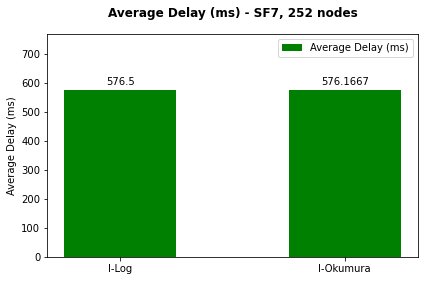

In [33]:
# labels = ['11 bytes', '51 bytes', '222 bytes']
# labels = ['Cenario I', 'Cenario II'] 
labels = ['I-Log', 'I-Okumura'] 

delay = [delay_0_df['average_delay_s'].mean(), delay_1_df['average_delay_s'].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, delay, width, label='Average Delay (ms)', color='green')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Delay (ms)')
ax.set_title('Average Delay (ms) - SF7, 252 nodes', fontweight='bold', fontsize=12, y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, max(delay) + max(delay)/3]) 
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()
fig.savefig('delay_performance.png',bbox_inches='tight')

# Clusters

In [2]:
# ----- DATASET

path = "dataset_bases_conteiners_n_reciclaveis.txt"
conteiners_df = pd.read_csv(path) 

# print(path)
print("\nSHAPE:", conteiners_df.shape)
conteiners_df.head()


SHAPE: (76, 4)


,BASE,N_CONT,LATITUDE,LONGITUDE
0,1,4,-22.824351,-47.059808
1,2,1,-22.823597,-47.060283
2,3,2,-22.824440,-47.061506
3,4,1,-22.820314,-47.060398
4,5A,2,-22.819888,-47.059931


In [64]:
# ---- UNICAMP DYNAMIC PLOT MAP & MARKERS OF POSITIONS THAT PACKET WERE RECEIVE

# create folium map
# fmap = folium.Map(width= 500,height=600,location=[-22.822617, -47.067], zoom_start=15, tiles='OpenStreetMap')
fmap = folium.Map(width= 1000,height=800,location=[-22.822617, -47.067], zoom_start=15, tiles='OpenStreetMap')

# add markers conteiners
for i in range(conteiners_df.shape[0]):
  lat, lng = conteiners_df['LATITUDE'][i], conteiners_df['LONGITUDE'][i]
  folium.Marker(
      location=[lat, lng],
      popup="Lat: " + str(lat) + ", Lng: " + str(lng),
#       popup="Lat: ",
      icon=folium.Icon(color="red", icon="info-sign"),
  ).add_to(fmap)

    
    
# add markers pilhas e baterias
for data in heat_data:
  lat, lng, rssi = data[0], data[1], data[2]
  folium.Marker(
      location=[float(lat), float(lng)],
      popup="Lat: " + str(lat) + ", Lng: " + str(lng)+ ", Rssi: " + str(rssi),
      icon=folium.Icon(color='darkblue'),
  ).add_to(fmap)

# salve map
fn="all_nodes_dataset.html"
fmap.save(fn)

fmap

In [57]:
# https://deparkes.co.uk/2016/06/24/folium-marker-clusters/
# https://github.com/python-visualization/folium/blob/main/examples/MarkerCluster.ipynb
# https://python-visualization.github.io/folium/plugins.html

from folium.plugins import MarkerCluster

fmap_test = folium.Map(width= 600,height=600,location=[-22.822617, -47.067], zoom_start=15, tiles='OpenStreetMap')

 
# create a marker cluster called "Public toilet cluster"
marker_cluster = MarkerCluster().add_to(fmap_test)

# add markers pilhas e baterias
for data in heat_data:
  lat, lng, rssi = data[0], data[1], data[2]
#   popup = 'Add <b>test</b>'
  popup="Lat: " + str(lat) + ", Lng: " + str(lng)+ ", Rssi: " + str(rssi)
  folium.Marker([float(lat), float(lng)], popup=popup).add_to(marker_cluster)

# fmap_test

In [65]:
from folium.plugins import MarkerCluster

# fmap_test = folium.Map(width= 500,height=600,location=[-22.822617, -47.067], zoom_start=15, tiles='OpenStreetMap')
fmap_test = folium.Map(width= 1000,height=800,location=[-22.822617, -47.067], zoom_start=15, tiles='OpenStreetMap')

marker_cluster = MarkerCluster().add_to(fmap_test)

# add markers conteiners
for i in range(conteiners_df.shape[0]):
  lat, lng = conteiners_df['LATITUDE'][i], conteiners_df['LONGITUDE'][i]
  popup='<b>ID: </b>{}<br><b>Lon: </b>{:.6F}<br><b>Lat: </b>{:.6F}'.format(i+conteiners_df.shape[0],lat, lng)
  folium.Marker([float(lat), float(lng)], popup=popup).add_to(marker_cluster)

# add markers pilhas e baterias
for data in heat_data:
  lat, lng, rssi = data[0], data[1], data[2]
#   popup = 'Add <b>test</b>'
  popup='<b>ID: </b>{}<br><b>Lon: </b>{:.6F}<br><b>Lat: </b>{:.6F}'.format(i+conteiners_df.shape[0],lat, lng)
  folium.Marker([float(lat), float(lng)], popup=popup).add_to(marker_cluster)


# salve map
fn="cluster_dataset.html"
fmap_test.save(fn)

# open html and center:

#map_06e1347cc0c34b619da1b4c505abd358 {
# position: relative;
# width: xxxpx;
# height: xxxpx;
# left: 0.0%;
# top: 0.0%;
# margin: 0 auto;
# }

fmap_test